# INFO 2950 Project - Final Report 
Net IDs: tjk223, bsp73, amm643, swp42

Names: Teddy Klausner, Ben Polson, Sasha Miranda, Spencer Pettee
### Details
This file is the final report section of our final project. There are multiple sections in the notebook and they will be organized in the following format: **Introduction, Data Description, Preregistration Statement, Data Analysis, Evaluation of Signifigance, Interpretation and Conclusion, Limitations, Souce Code, and Acknowledgements.** In addition to this file we also have two appendicies. The first appendix shows our cleaning and merging of the data files. The second appedix shows other work that is not shown in this file. 

## Introduction
What is the context of the work? What research question are you trying to answer? What are your main findings? Include a brief summary of your results.

In this project we wanted to work with multiple data sets, so we decided explore food expenditure and internet data. The first step was to clean both data files. After both files were clean and ready to work with we merged them based on country. Another goal was discovering how factors impact internet quality by country. To do this we built a multiple regression model which told us that some of the most important factors on internet quality are 

## Data Description

**What are the observations (rows) and the attributes (columns)?**

We are using data about internet usage internationally and a separate dataset containing GDP and food expenditure internationally. We combined the two datasets into one where rows are countries and columns of interest from the internet dataset are gender gap in internet access, urban electricity access, rural electricity access, smartphone cost, level of web accessibility, trust in online privacy, total electricity access, internet users. The columns of interest from the other dataset are GDP, and food expenditure.

**Why was this dataset created?**

The internet data set was created to measure four categories of “The Inclusive Internet Index,” which tracks internet services in countries across the world. The four categories are affordability, availability, relevance and readiness. The index is meant for advocacy organizations, local governments and journalists. 

This dataset was created by Our World in Data, which wanted to look at the relationship between GDP per person and food expenditure per person. The data was originally sourced from the World Bank, whose goal is to help countries solve issues. They record many general statistics for nearly every country.

**Who funded the creation of the dataset?**

The internet service dataset was funded by Facebook. The data seems to be funded to support Facebook's internet.org whose mission is to bring internet access to those who do not have it. 

The World Bank funded the creation of the second dataset, and they receive funding from returns on their investments, country membership fees, and donations made by members

**What processes might have influenced what data was observed and recorded and what was not?**

The idea of finding how connected people are is more than just taking a survey of <5,000 people. This information may not be representative of the true experience people have in their country. Lastly there is the issue of having a device that connects to the internet. People may be able to afford internet access, but cannot afford the initial price of buying a device. Although the survey apparently covers 91% of the population, can we be sure of that number? 

For the GDP and food expenditure per person, they are calculated by dividing total GDP and food expenditure by population. The World Bank sources this data from other organizations that are more specific to countries or groups of countries, such as the U.S. Census Bureau. What data was recorded and what wasn’t is determined by how well these organizations sampled and surveyed the population, and also how well the population responded to these surveys.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The data appears to be compiled into a single file with many different columns that measure a variety of metrics about internet service. If the data was from surveys was then compiled into countries. The data also combines some of information into categories like regions (such as North America and others). 

Similarly to the internet data, the food/GDP data was taken from survey within each country. This data was taken from these countries by the World Bank and they compiled all of it into one table.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

Yes the data was collected through a survey which asked 4,953 participants from 99 countries across Asia-Pacific, the Americas, Europe, the Middle East, North Africa and Sub-Saharan Africa. Considering they took a survey they likely knew the data was being collected. The source is unclear about what the participants thought the data was for. 

People were certainly aware of this data collection, and the purpose that the participants expected the data to be used for was not specified online. We would guess that they expect it to be used for general government purposes.

**Where can your raw source data be found, if applicable? Provide a link to the raw data.** 

https://drive.google.com/file/d/1R-GW2DyhUh5zsnOQBfxtm36_PCGUV3Kn/view?usp=sharing

https://drive.google.com/file/d/11-kbLU49T1SuG5k_y8ENJqKn6eAqwlUo/view?usp=sharing

## Preregistration Statement
#### Our Two Analyses
1) We will analyze the relationship between food expenditure and each of the columns in the internet dataset that we kept after cleaning. We hypothesize that some of these columns may have a relationship with food expenditure, and we would like to find out which ones do. We will conclude by using p-values and confidence intervals to examine whether these relationships are statistically significant.

2) We would like to build a model for internet accessibility given all of the other columns in the dataset that we kept after cleaning. We will build a multiple regression model where we will find out which predictors are statistically significant. From the final model, we will not only know what factors impact internet accessibility within countries, but we will also be able to predict the internet accessibility of a country that isn’t listed in the dataset using this model.

## Data Analysis

In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## load data
data = pd.read_csv("3i-index-data.csv", encoding='latin-1') #internetdata 
data2 = pd.read_csv("annualfoodcapital_clean.csv", encoding='latin-1')
if_data = pd.read_csv("clean_data.csv", encoding='latin-1') #merged if_data 

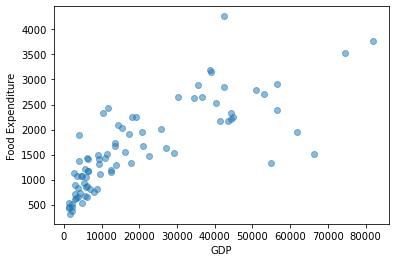

In [2]:
plt.scatter(if_data['GDP'],if_data['food_expenditure'], alpha=0.5)
plt.xlabel('GDP')
plt.ylabel('Food Expenditure')
plt.show()

As we can see the data points between GDP and food expenditure are correlated. From this scatter plot the association appears to be linear with many points in the range of GDP <20,000 and food expenditure <2,000. 

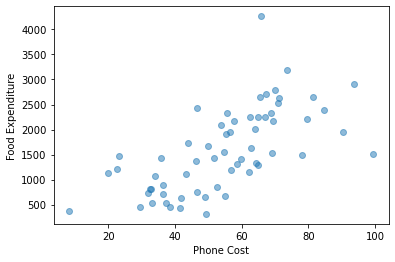

In [3]:
plt.scatter(if_data['phone_cost'],if_data['food_expenditure'], alpha=0.5)
plt.xlabel('Phone Cost')
plt.ylabel('Food Expenditure')
plt.show()

This graph shows the food expenditure as a function of food cost. Again the data appears to have a positive linear correlation with food expenditure increasing as phone cost increases.

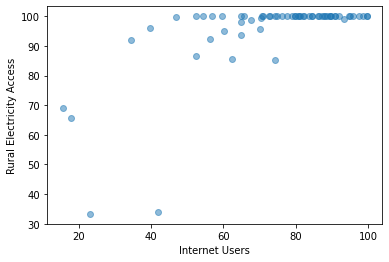

In [4]:
plt.scatter(if_data['internet_users'],if_data['rural_elec_access'], alpha=0.5)
plt.xlabel('Internet Users')
plt.ylabel('Rural Electricity Access')
plt.show()

This graph shows the relationship between Internet Users and Rural Electricity Access. The plot has many of the points clustered in the top right. To gain a better idea of the relationship we can perform a log transformation to attempt to linearize the data.  

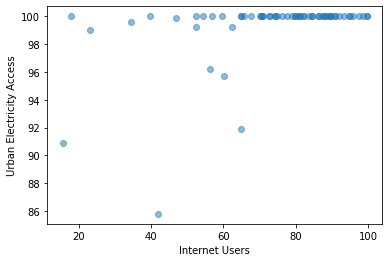

In [5]:
plt.scatter(if_data['internet_users'],if_data['urban_elec_access'], alpha=0.5)
plt.xlabel('Internet Users')
plt.ylabel('Urban Electricity Access')
plt.show()

This final plot is similar to the last in how the data has many points in the top right. We can also perform a log transformation on this plot to try and linearize the data.

## Data Limitations

The data is fairly robust and does not have too many limitations. One limitation is that the data is based around the experiences in each country, but the experiences in both internet and food expenditure can be different within each region of countries. This is especially true for larger countries and countries with vast differences in wealth across  regions. 


# Analysis 1 


## Model Building

In this section, we are going to try to fit a model where we use the columns we picked as predictors for level of web accessability. While we know that the relationships between many of these columns and level of web accessability are not causal, we could still use them as predictors if there is a strong correlation. We are going to build the model using AIC and BIC selection. AIC (Akaike's Information Criteria) often overestimates the number of significant predictors and is best for large datasets where number of observations divided by number of candidate variables is greater than 40. Since this is not the case for our data set, we will start with BIC (Bayesian Information Criteria), which underestimates the number of significant predictors.

In [7]:
from sklearn import linear_model

X = if_data.drop(['country', 'web_access'], axis=1) #X is an array of all of the candidate variables
y = if_data['web_access'] #y is the dependent variable, web accessibility

model = linear_model.LassoLarsIC('bic').fit(X, y)

print('Coefficients:\n' + str(model.coef_))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Given that all of the coefficients are zero, BIC is saying that none of the predictors are statistically significant. We will try AIC instead:

In [ ]:
modelA = linear_model.LassoLarsIC('aic').fit(X, y)

print('Coefficients:\n' + str(modelA.coef_))
print('\nR squared: ' + str(modelA.score(X,y)))

Most of the coefficients of significant predictors are close to zero, and the R squared value is very low. Since AIC is the more generous of the two criteria, the columns we chose arbitrarily clearly do not have a strong correlation with web accessibility. After seeing this result, we rethought about what we are really trying to do here. We realized that it did not make sense to drop columns while cleaning the dataset because some of those columns may have had a correlation with web access. Therefore, we are going to try building a model with the entire internet acessibility dataset. It is already clean other than the fact that the column names are long, but there are many columns and the long names help accurately describe what they represent, so we will leave the full dataset as is for now as you can see below.

In [ ]:
full_internet_data = pd.read_csv("3i-index-data.csv", encoding='latin-1')

new_colnames_full = [c[c.find(')') + 2:].lower() for c in full_internet_data.columns]
new_colnames_full = [c.replace(' ', '_') for c in new_colnames_full]
new_colnames_full = [c[:c.find('/')] + '(' + c[c.find('/') + 2:] + ')' for c in new_colnames_full]

full_internet_data.columns = new_colnames_full

full_internet_data.head()

In [ ]:
X = full_internet_data.drop(['s(o)', 'ountry(roup)', 'level_of_web_accessibility_(qualitative_rating_0-4,_4=best)'], axis=1) #X is an array of all of the candidate variables
y = full_internet_data['level_of_web_accessibility_(qualitative_rating_0-4,_4=best)'] #y is the dependent variable, web accessibility

model = linear_model.LassoLarsIC('bic').fit(X, y)

print('Coefficients:\n' + str(model.coef_))
print('\nR squared: ' + str(model.score(X,y)))

In [ ]:
modelA = linear_model.LassoLarsIC('aic').fit(X, y)

print('Coefficients:\n' + str(modelA.coef_))
print('\nR squared: ' + str(modelA.score(X,y)))

In [ ]:
#find which variables are significant according to AIC criteria

coefficients = []

for i in range(len(modelA.coef_)):
    if modelA.coef_[i] != 0:
        coefficients.append(X.columns[i])

#do linear regression with only those columns as the predictors
import statsmodels.api as sm

reg12 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg12.summary()

In [ ]:
coefficients.remove('bandwidth_capacity_(bit/s_per_internet_user)')
reg11 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg11.summary()

In [ ]:
coefficients.remove('average_revenue_per_user_(arpu,_annualized)_(usd)')
reg10 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg10.summary()

In [ ]:
coefficients.remove('private_sector_initiatives_to_make_wi-fi_available_(qualitative_rating_0-2,_2=best)')
reg9 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg9.summary()

In [ ]:
coefficients.remove('internet_exchange_points_(number_of_ixps_per_10_million_inhabitants)')
reg8 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg8.summary()

In [ ]:
coefficients.remove('eiu_business_environment_rankings_(score,_1-10,_10_=_high)')
reg7 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg7.summary()

In [ ]:
coefficients.remove('availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)')
reg6 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg6.summary()

In [ ]:
coefficients.remove('technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)')
reg5 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg5.summary()

In [ ]:
print(coefficients)

In [ ]:
newNames = {'mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)':'Cell_Cost', 'value_of_e-finance_(%)':'E-Finance_Value','support_for_digital_literacy_(qualitative_rating_0-3,_3=best)':'Support_For_Dig_Lit','government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)':'Govt_Promote_5g','democracy_index_(score,_0-10;_10_=_best)':'Democracy_Index'}
full_internet_data = full_internet_data.rename(columns=newNames)
coefficients = list(newNames.values())

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=2).fit_transform(full_internet_data[coefficients])
interaction = pd.DataFrame(interaction)
full_internet_data[coefficients].head()

In [ ]:
interaction.head()

In [ ]:
internet_data_SQ = full_internet_data.copy()
coefficients_SQ = coefficients.copy()

In [ ]:
internet_data_SQ['Cell_Cost_SQ'] = interaction[6]
internet_data_SQ['E-Finance_Value_SQ'] = interaction[11]
internet_data_SQ['Support_For_Dig_Lit_SQ'] = interaction[15]
internet_data_SQ['Govt_Promote_5g_SQ'] = interaction[18]
internet_data_SQ['Democracy_Index_SQ'] = interaction[20]

In [ ]:
coefficients_SQ.extend(['Cell_Cost_SQ','E-Finance_Value_SQ','Support_For_Dig_Lit_SQ','Govt_Promote_5g_SQ','Democracy_Index_SQ'])

In [ ]:
regSQ5 = sm.OLS(y, internet_data_SQ[coefficients_SQ]).fit()
regSQ5.summary()

finalize model with significant interaction terms
plot multivariable regression maybe
write it uppp

Since the squared values all increased the p values, we shall re remove them.

In [ ]:
internet_data_inter = full_internet_data.copy()
coefficients_inter = coefficients.copy()

In [ ]:
for i in interaction.columns:
    if i not in [0,1,2,3,4,5,6,11,15,18,20]:
        internet_data_inter['interaction ' + str(i)] = interaction[i]
        coefficients_inter.append('interaction ' + str(i))

In [ ]:
regi = sm.OLS(y, internet_data_inter[coefficients_inter]).fit()
regi.summary()

In [ ]:
internet_data_final = full_internet_data.copy()
coefficients_final = coefficients.copy()

In [ ]:
internet_data_final['Govt_Promote_5g:Democracy_Index'] = interaction[19]
coefficients_final.extend(['Govt_Promote_5g:Democracy_Index'])

In [ ]:
regi19 = sm.OLS(y, internet_data_final[coefficients_final]).fit()
regi19.summary()

In [ ]:
internet_data_final.drop(columns=['Support_For_Dig_Lit'])
coefficients_final.remove('Support_For_Dig_Lit')

In [ ]:
reg_final = sm.OLS(y, internet_data_final[coefficients_final]).fit()
reg_final.summary()

In [ ]:
internet_data_final[coefficients_final].head()

In [ ]:
X = internet_data_final[coefficients_final]

# Analysis 2

In [ ]:
corr=if_data.corr()
corr_table=corr.loc['food_expenditure',:]
print('Correlation Coefficients of Food Expenditure and Internet Data')
print(corr_table)

In [ ]:
import seaborn as sns
sns.heatmap(if_data.corr())

Based on the correlations listed above and the heatmap, we can conclude that the gender gap and privacy trust have the strongest negative correlation while GDP, phone cost and internet users have the strongest positive correlation with food expenditure. Below are the calculated p-values in comparison to a 0.5 alpha level to determine which correlations are statistically significant. 

In [ ]:
food_expend = if_data['food_expenditure']
phone_cost = if_data['phone_cost']
privacy_trust = if_data['privacy_trust']
internet_users = if_data['internet_users']
GDP = if_data['GDP']
gender_gap = if_data['gender_gap']

In [ ]:
def plotreg(data, x_label, y_label):
    """
    Makes a scatter plot of data['x_label'] vs data['y_label']
    """
    plt.scatter(data[x_label], data[y_label], alpha=.6)
    plt.title(x_label + ' vs ' + y_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [ ]:
def plotreg_resid(model, x_label, y_label):
    """
    Makes a scatter plot of predicted values for data['y_label'] vs standardized residuals
    (the number of standard deviations the actual values are away from their predicted value)
    """
    student_residuals = pd.Series(model.get_influence().resid_studentized_internal)
    fitted = model.fittedvalues
    plt.scatter(fitted, student_residuals, alpha=.6)
    plt.hlines(y=0,xmin=0, xmax=140, linewidth=2,color='r')
    plt.title('Fitted values vs Standardized Residuals')
    plt.xlabel('Fits')
    plt.ylabel('Std Resids')
    plt.show()
    return student_residuals

In [ ]:
# Regression analysis for phone cost
plotreg(data, 'food_expenditure', 'phone_cost')

In [ ]:
import statsmodels.api as sm
model_pc = sm.OLS(phone_cost, food_expend).fit()

In [ ]:
student_residuals = plotreg_resid(model_pc, 'food_expenditure', 'phone_cost')

Since one of the points is more than 3 standard deviations from its predicted value, we will consider it an outlier and perform linear regression on the data with this point removed.

In [ ]:
data_no_outliers = data[abs(student_residuals) <= 2.2]
model_pc2 = sm.OLS(data_no_outliers['phone_cost'], data_no_outliers['food_expenditure']).fit()

In [ ]:
z =plotreg_resid(model_pc2, 'food_expenditure', 'phone_cost')

In [ ]:
sns.regplot(x='food_expenditure', y='phone_cost', data=data_no_outliers)

In [ ]:
plotreg(data_no_outliers, 'food_expenditure', 'phone_cost')